In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [115]:
df = pd.read_csv('clean_data.csv')
df

,Unnamed: 0,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
0,0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,...,0.0,-1.00,0.0,15.0,4.000000,0.0,0.000000,0.0,-1.0,0.0
1,1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,...,0.0,4.15,114.0,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0
2,2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,...,0.0,-1.00,0.0,4.0,4.000000,0.0,0.000000,0.0,-1.0,0.0
3,3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,...,0.0,-1.00,0.0,2.0,4.500000,0.0,4.800000,5.0,-1.0,0.0
4,4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,...,0.0,4.15,21338.0,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,14995,a390609289521a,2022-10-25 00:00:00,1,0.0,0.0,0.0,669.0,0.00,1.0,...,0.0,-1.00,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0
14992,14996,a560206225313a,2021-03-13 00:00:00,1,0.0,0.0,0.0,1.0,0.00,1.0,...,0.0,-1.00,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0
14993,14997,a503610997836a,2021-05-08 00:00:00,1,0.0,0.0,0.0,177.0,0.00,1.0,...,0.0,-1.00,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0
14994,14998,a212406459136a,2022-11-01 00:00:00,2,0.0,0.0,0.0,521.0,0.00,2.0,...,0.0,-1.00,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0


<AxesSubplot: >

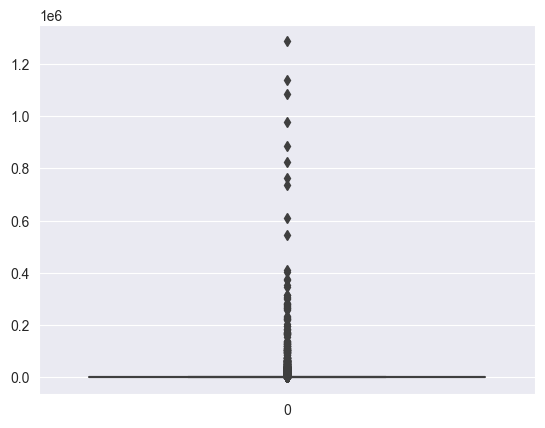

In [116]:
sns.boxplot(df.phb_all)

In [3]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis"
]
rating_count_columns = [
    "ratings_cnt_ya"
]
reviews_count_columns = [
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_avito",
    "reviews_cnt_2gis",
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir",  # !
    "phb_all_bad_dir",  # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num"
]

In [4]:
df['all_reviews_cnt'] = df[reviews_count_columns].sum(axis=1)

In [5]:
def get_mean_rating(row):
    sm = n = 0
    for r, cnt in zip(row[rating_columns], row[reviews_count_columns]):
        if r > 0:
            sm += r * cnt
            n += cnt
    if n == 0:
        return 0
    return sm / n


df['mean_rating'] = df.apply(lambda x: get_mean_rating(x), axis=1)
df.head()

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,0.0,15.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,15.0,0.000000
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,0.0,...,114.0,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0,47.0,4.039058
2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,0.0,...,0.0,4.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,4.0,0.000000
3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,0.0,...,0.0,2.0,4.500000,0.0,4.800000,5.0,-1.0,0.0,7.0,4.800000
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,21338.0,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,0.0,9023.0,3.242698


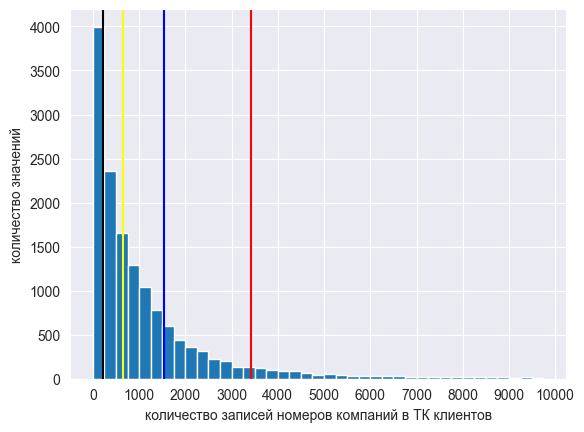

In [49]:
df[df.phb_all > 0].phb_all.hist(bins = np.arange(0, 10000, 250))
plt.xticks(np.arange(0, 11000, 1000))
# plt.title('гистограмма распределения кол-ва записей в ТК клиентов')
plt.xlabel('количество записей номеров компаний в ТК клиентов')
plt.ylabel('количество значений')
plt.axvline(df.phb_all.quantile(0.25), color='black')
plt.axvline(df.phb_all.quantile(0.5), color='yellow')
plt.axvline(df.phb_all.quantile(0.75), color='blue')
plt.axvline(df.phb_all.quantile(0.9), color='red')

In [64]:
q = [122, 520, 1318, 2758, 1e9]

def get_size(phb_cnt):
    for i, v in enumerate(q):
        if phb_cnt <= v:
            return i


df['popularity'] = df['phb_all'].apply(lambda x: get_size(x))
df

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,all_reviews_cnt,mean_rating,popularity
0,a782615660478a,2022-10-30 00:00:00,1,0.0,2.0,2.0,1498.0,0.13,1.0,0.0,...,15.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,15.0,0.000000,3
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.00,16.0,0.0,...,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0,47.0,4.039058,3
2,a745212602258a,2021-06-03 00:00:00,4,0.0,0.0,0.0,1503.0,0.00,3.0,0.0,...,4.0,4.000000,0.0,0.000000,0.0,-1.0,0.0,4.0,0.000000,3
3,a2466264323a,2022-09-25 00:00:00,3,0.0,0.0,0.0,77.0,0.00,2.0,0.0,...,2.0,4.500000,0.0,4.800000,5.0,-1.0,0.0,7.0,4.800000,0
4,a7728551510a,2022-04-28 00:00:00,161,4.0,2.0,6.0,17842.0,0.03,145.0,0.0,...,5772.0,4.244828,308.0,1.358362,2943.0,-1.0,0.0,9023.0,3.242698,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,a390609289521a,2022-10-25 00:00:00,1,0.0,0.0,0.0,669.0,0.00,1.0,0.0,...,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000,2
14996,a560206225313a,2021-03-13 00:00:00,1,0.0,0.0,0.0,1.0,0.00,1.0,0.0,...,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000,0
14997,a503610997836a,2021-05-08 00:00:00,1,0.0,0.0,0.0,177.0,0.00,1.0,0.0,...,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000,1
14998,a212406459136a,2022-11-01 00:00:00,2,0.0,0.0,0.0,521.0,0.00,2.0,0.0,...,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,0.0,0.0,0.000000,2


In [ ]:



def check_reviews_count(x):
    phb_all, all_reviews_cnt = x



In [65]:
susp_reviews_cnt = df[df['phb_all', 'all_reviews_cnt'].apply(lambda x: check_reviews_count(x), axis=1)]
susp_reviews_cnt.shape

(75, 38)

In [69]:
def check_rating(columns):
    for a in columns:
        if a == -1:
            continue
        for b in columns:
            if b == -1:
                continue
            if abs(a - b) > 2.5:
                return True
    return False


susp_rating = df[(df[rating_columns].apply(lambda x: check_rating(x), axis=1)) & (df.all_reviews_cnt > 10)]
susp_rating.shape

(1623, 38)

In [53]:
df1 = pd.read_csv('tinkoff_legal_entities_new.csv')
missing = df1.isna().sum() / df1.shape[0] * 100
missing

id                           0.000000
date                         0.000000
phones_num                   0.000000
phb_fraud                    0.073333
phb_dirty                    0.073333
phb_all_bad                  0.073333
phb_all                      0.073333
phb_bad_perc                 0.073333
found_phones                 0.073333
phb_fraud_dir                8.206667
phb_dirty_dir                8.206667
phb_all_bad_dir              8.206667
phb_all_dir                  8.206667
phb_bad_perc_dir             8.206667
found_phones_dir             8.206667
claims_percent              34.013333
claims_num                  34.013333
appl_num                    34.013333
complaints_num              99.880000
complaints_num_dir          99.693333
mvd_request_num             93.320000
bad_rep_tcb                 99.153333
total_case_cnt              99.573333
total_defendant_case_cnt    99.573333
total_defendant_case_amt    99.573333
defendant_case_perc         99.573333
rating_ya   

In [54]:
missing.sort_values(inplace=True)

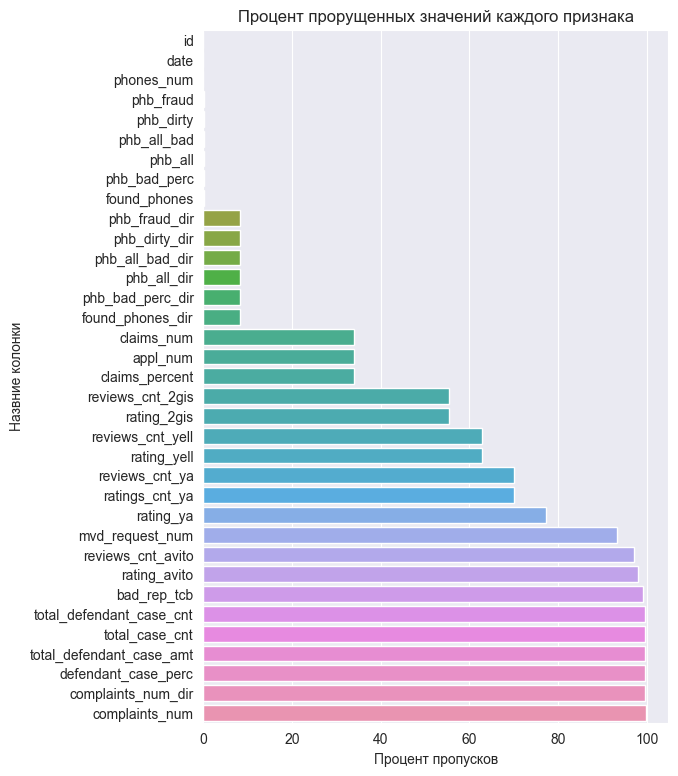

In [55]:
plt.figure(figsize=(6, 9))
sns.barplot(y=missing.index, x=missing.values)
plt.xlabel('Процент пропусков')
plt.ylabel('Назвние колонки')
plt.title('Процент прорущенных значений каждого признака')
plt.savefig('figures/missing_perc.png')

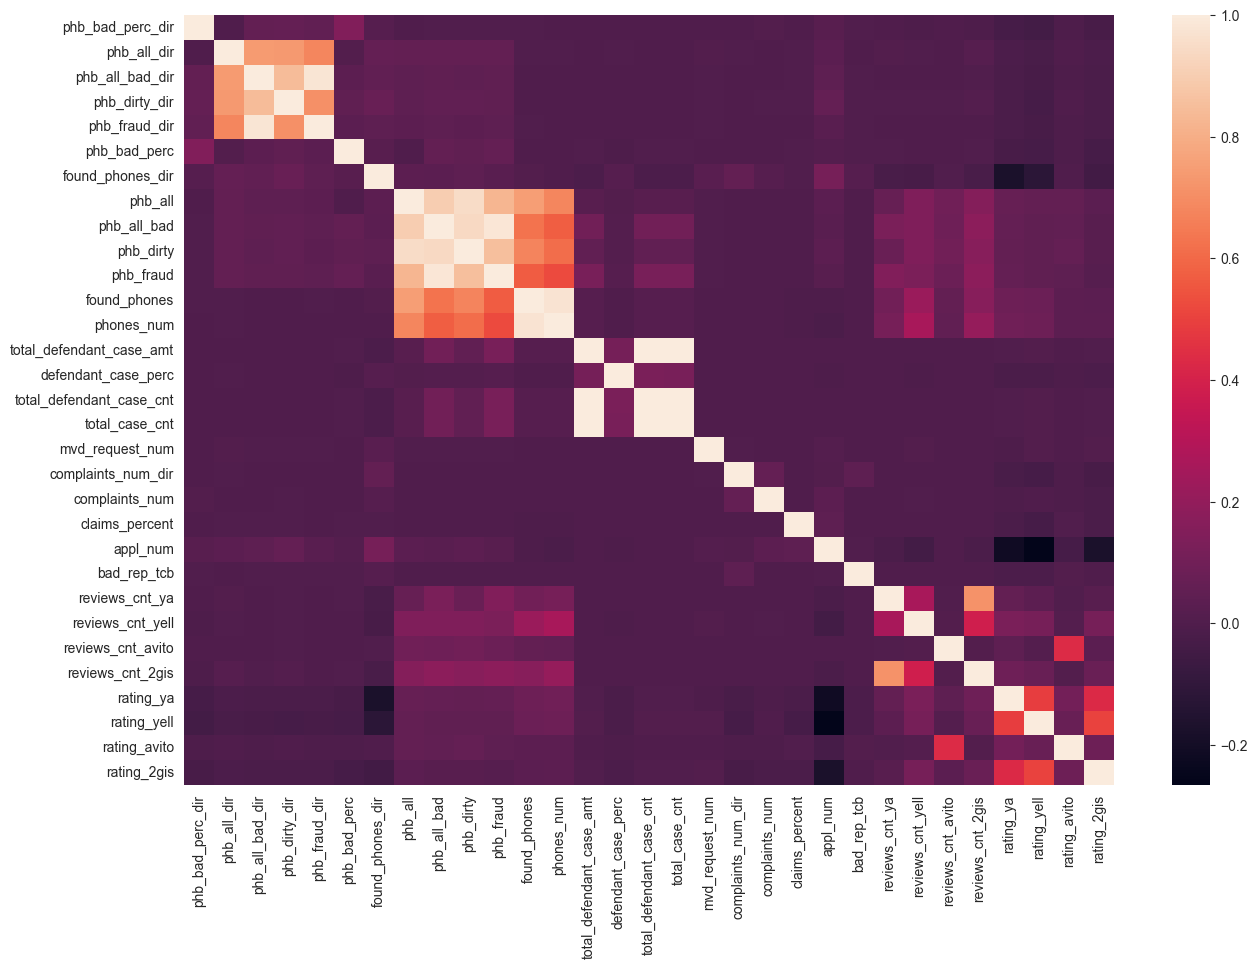

In [56]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[phones + bank_and_police + reviews_count_columns + rating_columns].corr())
plt.savefig("figures/corr.png")

<AxesSubplot: >

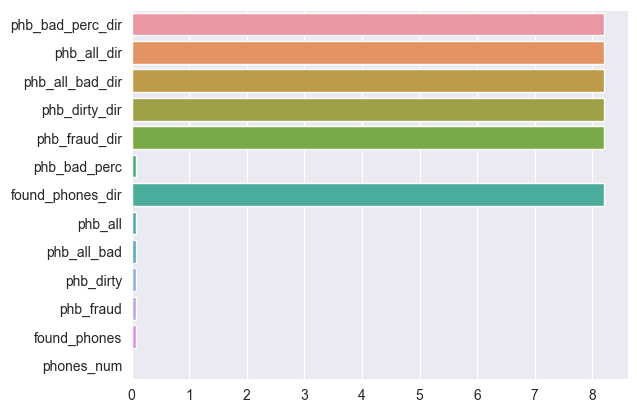

In [57]:
sns.barplot(y=missing[phones].index, x=missing[phones].values)

In [20]:
missing_by_groups = pd.Series([missing[phones].values.mean(),
                                missing[bank_and_police].values.mean(),
                                missing[reviews_count_columns].values.mean(),
                                missing[rating_columns].values.mean()])

missing_by_groups.index = ['телефонные номера','суды и жалобы',"количество отзывов", "рейтинг"]
missing_by_groups.sort_values(inplace=True)

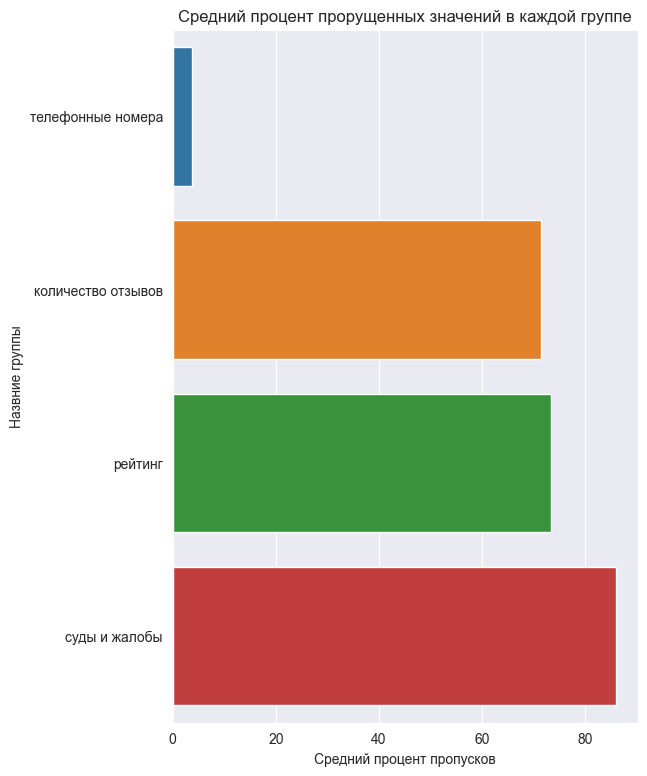

In [21]:
plt.figure(figsize=(6, 9))
sns.barplot(y=missing_by_groups.index, x=missing_by_groups.values)
plt.xlabel('Средний процент пропусков')
plt.ylabel('Назвние группы')
plt.title('Средний процент прорущенных значений в каждой группе')
plt.savefig('figures/missing_by_group_perc.png')

In [22]:
df.shape

(15000, 38)

<AxesSubplot: xlabel='popularity', ylabel='all_reviews_cnt'>

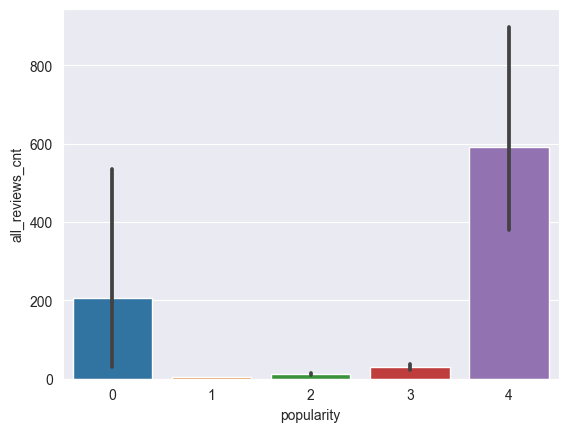

In [87]:
sns.barplot(x=df.popularity, y=df.all_reviews_cnt)

<AxesSubplot: xlabel='popularity', ylabel='mean_rating'>

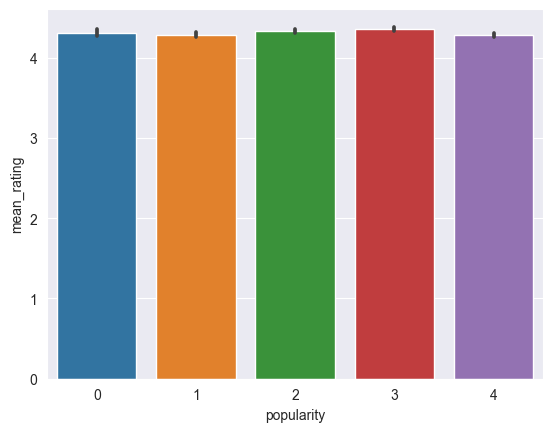

In [106]:
df2 = df[df.mean_rating > 0]
sns.barplot(x=df2.popularity, y=df2.mean_rating)

C:\Users\arkhi\AppData\Local\Temp\ipykernel_2012\481320697.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 5, 0.5))


Text(0, 0.5, 'Средний рейтинг по группе')

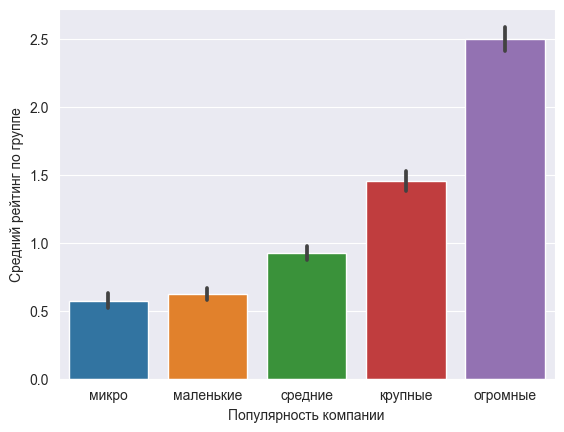

In [105]:

ax = sns.barplot(x=df.popularity, y=df.mean_rating)
ax.set_xticklabels(['микро', "маленькие", "средние", "крупные", "огромные"])
# ax.set_yticklabels(np.arange(0, 5, 0.5))
plt.xlabel("Популярность компании")
plt.ylabel("Средний рейтинг по группе")
